# Project 3 - **Space X Falcon 9 first stage landing prediction**

## Part 2 - EDA with Pandas and Matplotlib

### Objectives
Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

- Exploratory Data Analysis
- Preparing Data Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
df = pd.read_csv(URL)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

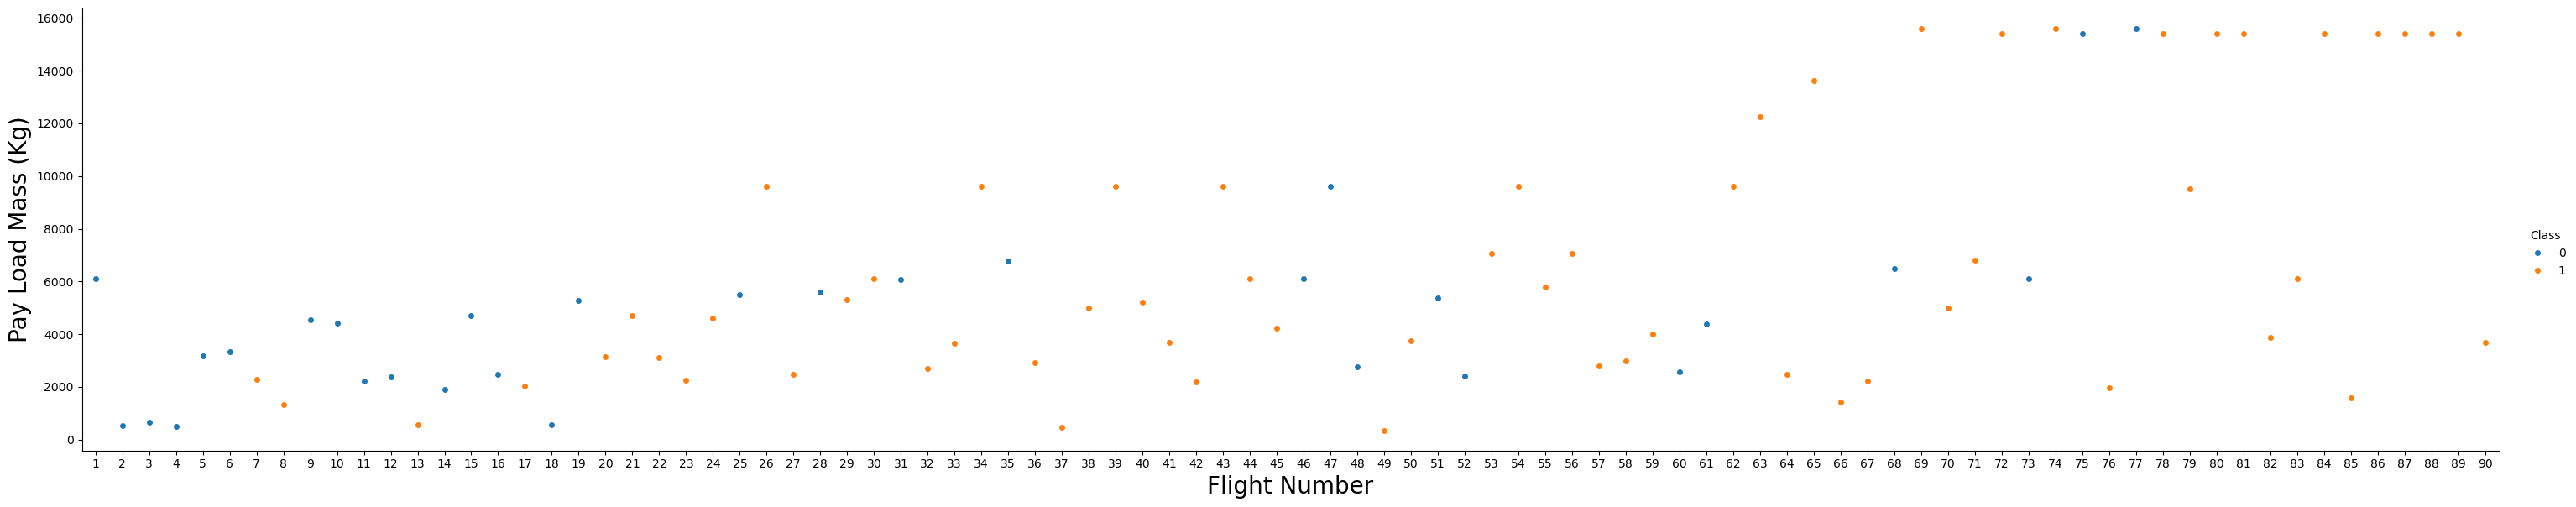

In [7]:
sns.catplot(y = 'PayloadMass', x = 'FlightNumber', hue = 'Class', data = df, aspect = 5, height = 6, kind = 'swarm') #categorical plot (cat plot)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Pay Load Mass (Kg)', fontsize = 20)
plt.show()

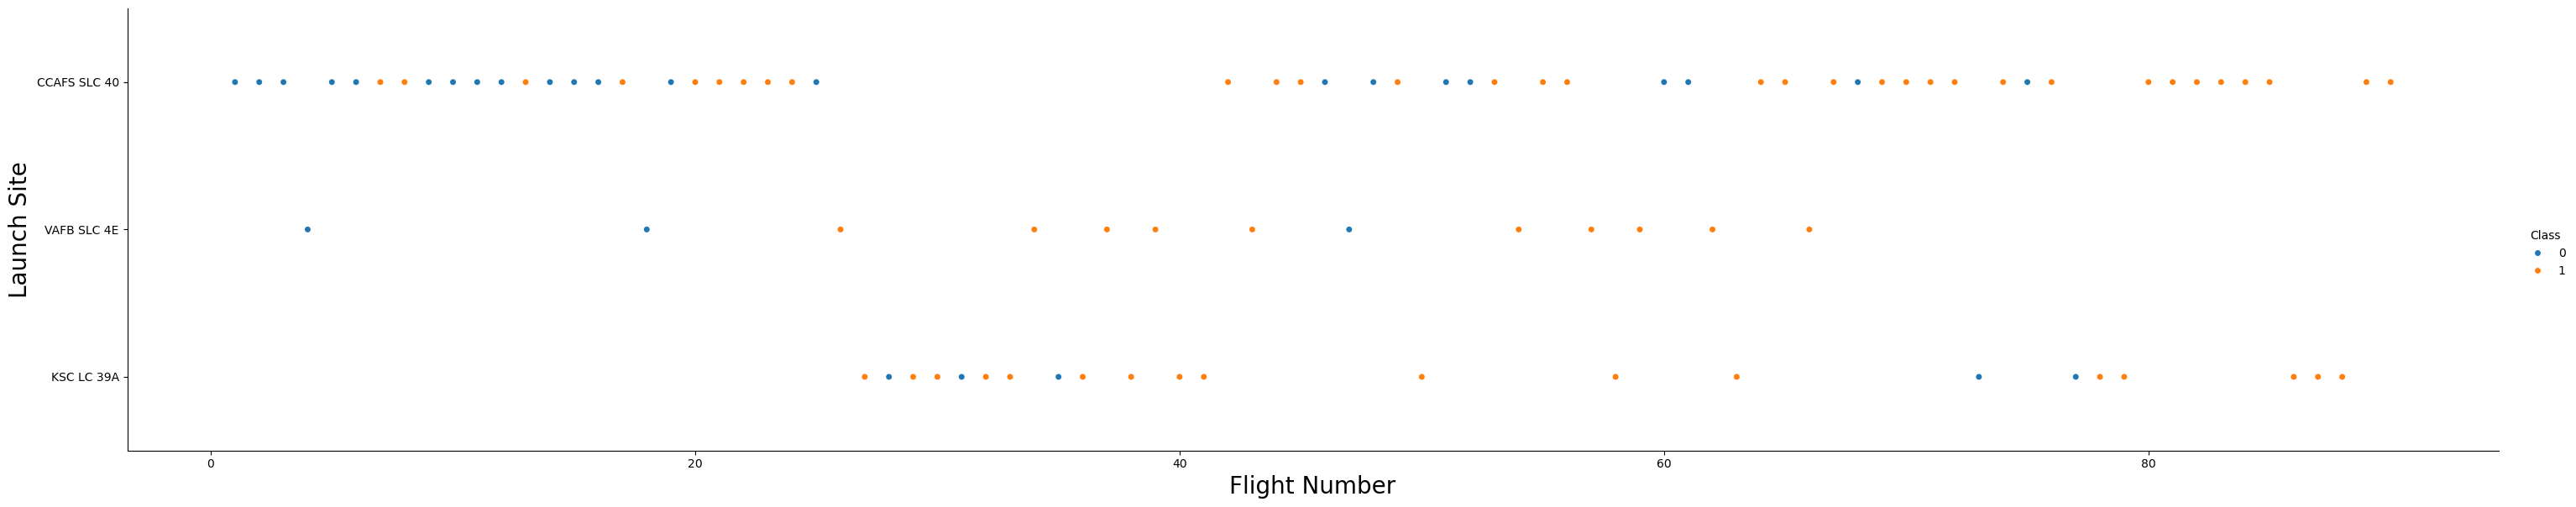

In [8]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x = 'FlightNumber', y = 'LaunchSite', hue = 'Class', data = df, aspect = 5, height = 6, kind = 'swarm')
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Launch Site', fontsize = 20)
plt.show()

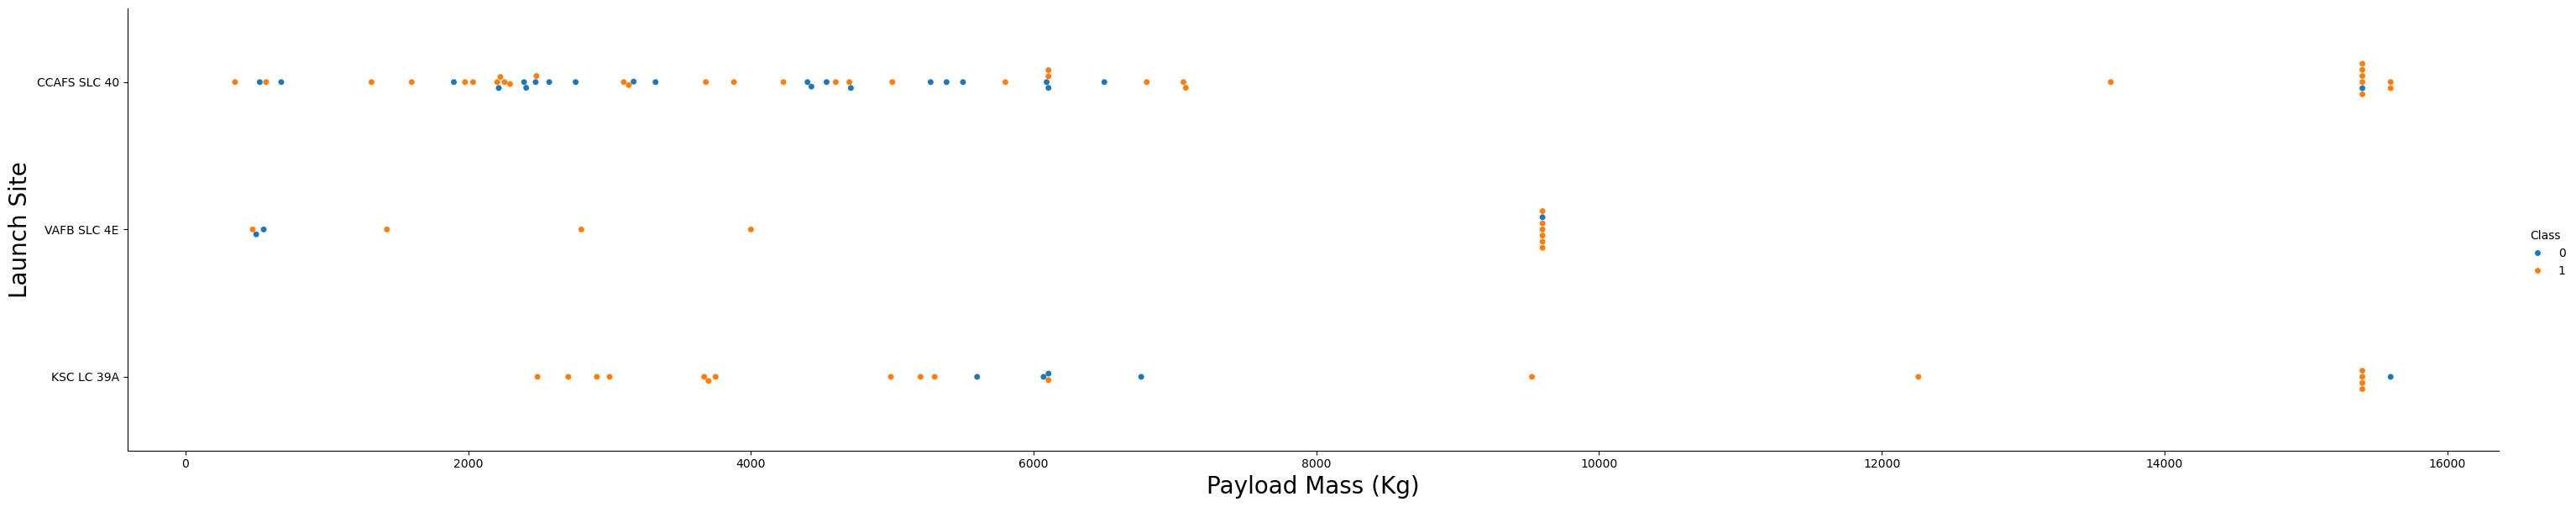

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x = 'PayloadMass', y = 'LaunchSite', hue = 'Class', data = df, aspect = 5, height = 6, kind = 'swarm')
plt.xlabel('Payload Mass (Kg)', fontsize = 20)
plt.ylabel('Launch Site', fontsize = 20)
plt.show()

Now if we observe Payload Mass Vs. Launch Site scatter point chart we will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

### Visualize the relationship between success rate of each orbit type
Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a `bar chart` for the sucess rate of each orbit

In [10]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

C:\Users\ABID\AppData\Local\Temp\ipykernel_2120\212376429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success, palette='viridis')


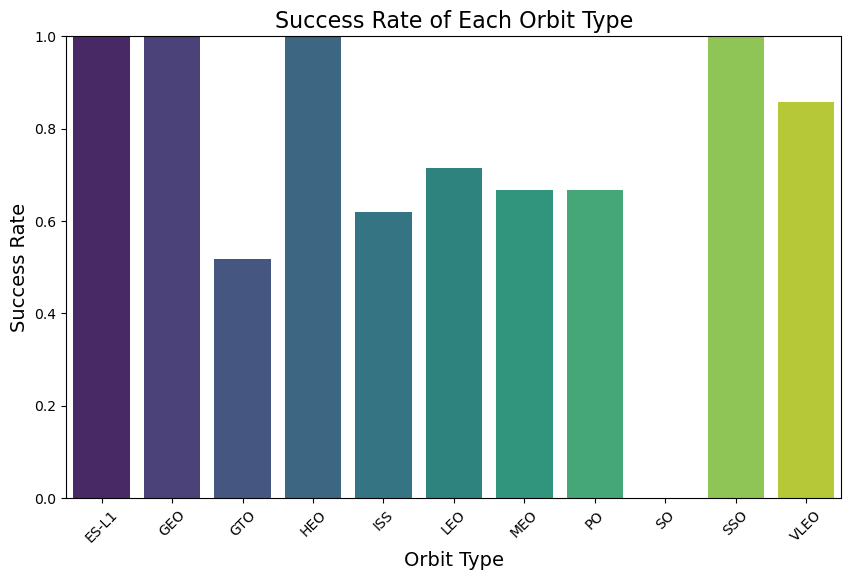

In [11]:
# Group by 'Orbit' and calculate the mean success rate
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='Class', data=orbit_success, palette='viridis')

# Labels and title
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.title('Success Rate of Each Orbit Type', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Since success rate is between 0 and 1

plt.show()


#### Analysis:
- The orbits with the highest success rates will have bars closer to 1.0 (i.e., ES-L1, GEO, HEO, SSO)
- Lower success rate orbits may indicate more failures in those specific orbits (i.e., GTO)

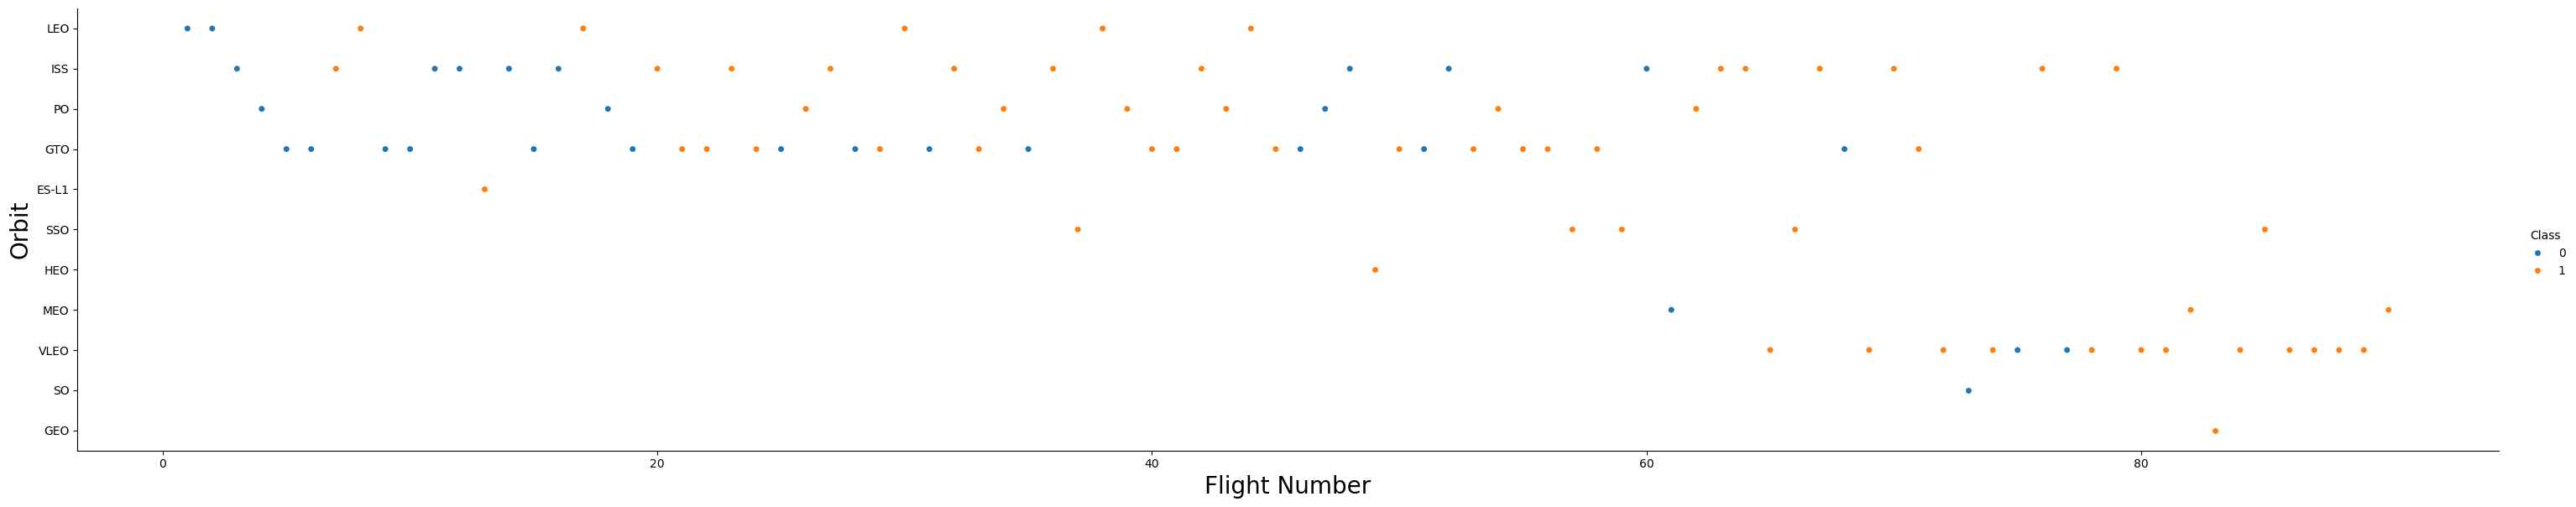

In [12]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x = 'FlightNumber', y = 'Orbit', hue = 'Class', data = df, aspect = 5, height = 6, kind = 'swarm')
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.

F:\ABID\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\ABID\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


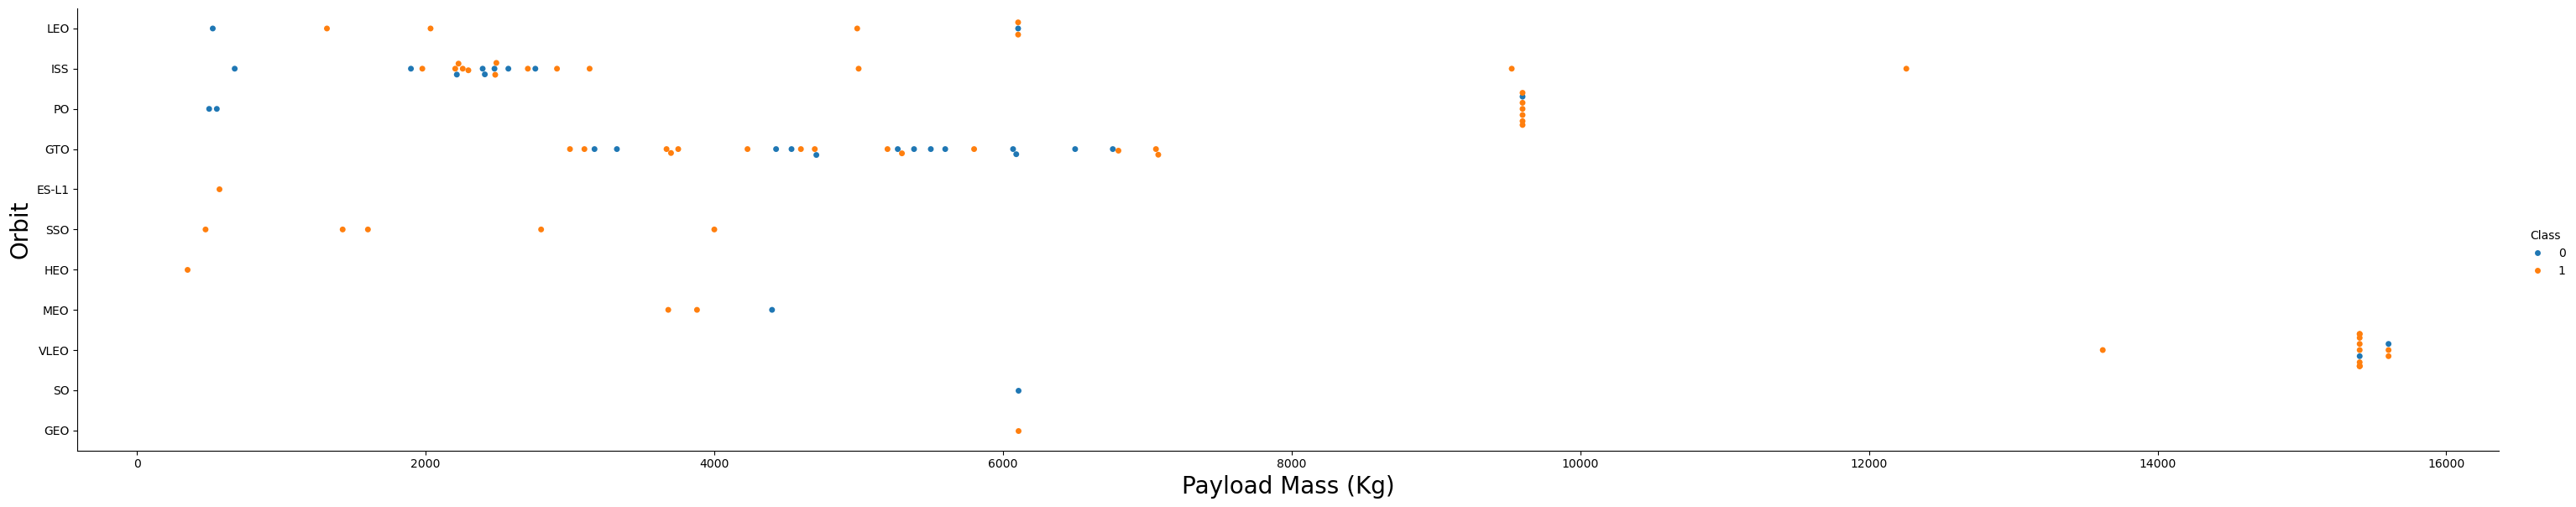

In [13]:
#Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.catplot(x = 'PayloadMass', y = 'Orbit', hue = 'Class', data = df, aspect = 5, height = 6, kind = 'swarm')
plt.xlabel('Payload Mass (Kg)', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
plt.show()

#### Visualize the launch success yearly trend
You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [14]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


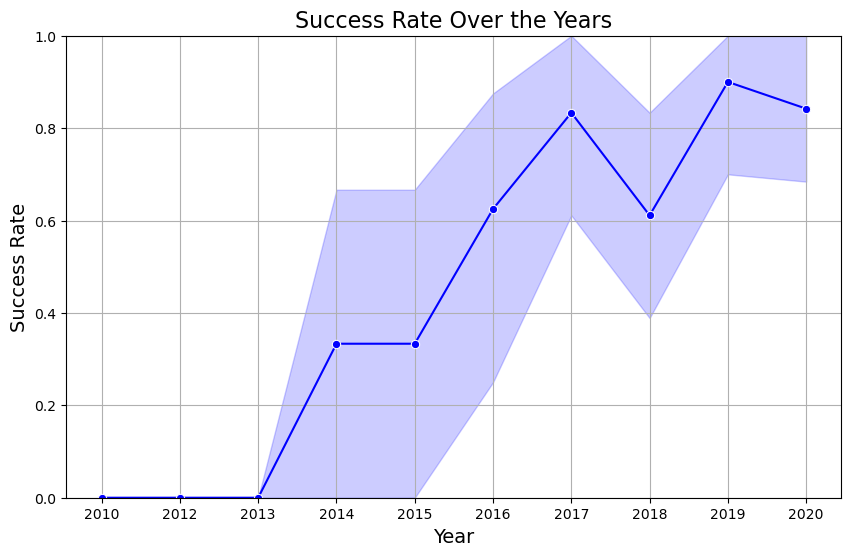

In [15]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Class', data=df, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.title('Success Rate Over the Years', fontsize=16)
plt.ylim(0, 1)  # Set y-axis between 0 and 1
plt.grid(True)

plt.show()

We can observe that the sucess rate since 2013 kept increasing till 2020

### Features Engineering
By now, we have got some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [16]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


#### Create dummy variables to categorical columns
Use the function `get_dummies` and `features` dataframe to apply OneHotEncoder to the column `Orbits`, `LaunchSite`, `LandingPad`, and `Serial`. Assign the value to the variable `features_one_hot`, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [20]:
# Select categorical columns to encode
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply OneHotEncoding using get_dummies()
features_one_hot = pd.get_dummies(features, columns=categorical_columns)

# Display the first 5 rows
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Cast all numeric columns to float64
Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64

In [21]:
# Convert all columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display the first 5 rows
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
features_one_hot.to_csv('dataset_spacex_part_3.csv', index=False)